SQNR for Uniform PCM: 2.7758425385173604
SQNR for Nonuniform PCM: 2.7758425385173604


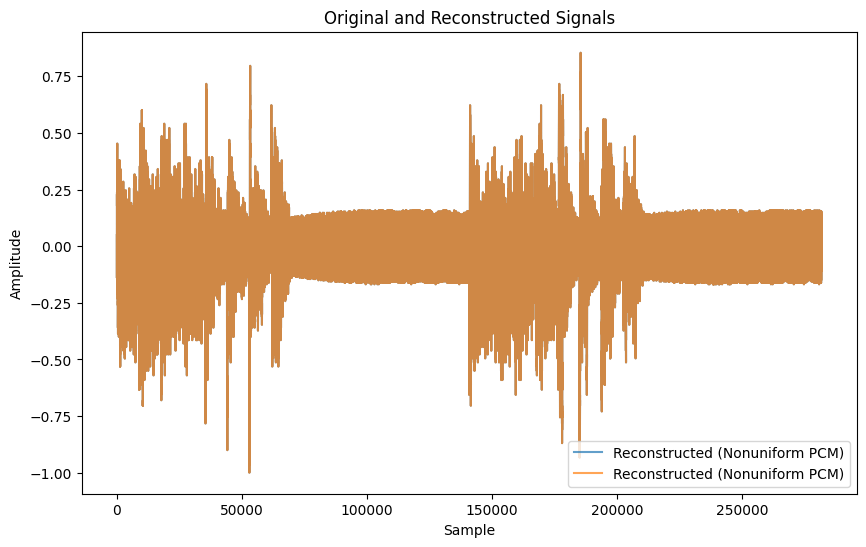

In [4]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def mu_law_compress(signal, mu=255):
    """μ-law compression"""
    return np.sign(signal) * (np.log(1 + mu * np.abs(signal)) / np.log(1 + mu))

def mu_law_expand(compressed_signal, mu=255):
    """μ-law expansion"""
    return np.sign(compressed_signal) * (1 / mu) * ((1 + mu) ** np.abs(compressed_signal) - 1)

def uniform_pcm(signal, levels):
    """Uniform PCM encoding"""
    quantized_values = np.digitize(signal, levels) - 1
    return quantized_values

def nonuniform_pcm(signal, levels):
    """Nonuniform PCM encoding"""
    quantized_values = np.zeros_like(signal, dtype=int)
    for i, level in enumerate(levels):
        quantized_values[signal >= level] = i
    return quantized_values

def calculate_SQNR(original_signal, quantized_signal):
    """Calculate Signal-to-Quantization Noise Ratio (SQNR)"""
    signal_power = np.sum(original_signal ** 2)
    quantization_error = original_signal - quantized_signal
    noise_power = np.sum(quantization_error ** 2)
    return 10 * np.log10(signal_power / noise_power)

# Load speech signal
speech_signal, sample_rate = sf.read('speech.wav')

# Normalize signal to range [-1, 1]
speech_signal /= np.max(np.abs(speech_signal))

# Apply A-law compression
compressed_signal = mu_law_compress(speech_signal)

# Define levels for nonuniform PCM
num_levels = 256
min_level = np.min(compressed_signal)
max_level = np.max(compressed_signal)
levels = np.linspace(min_level, max_level, num_levels)

# Encode using uniform PCM
uniform_quantized_signal = uniform_pcm(compressed_signal, levels)

# Encode using nonuniform PCM
nonuniform_quantized_signal = nonuniform_pcm(compressed_signal, levels)

# Decode using inverse of A-law compression
uniform_reconstructed_signal = A_law_expand(levels[uniform_quantized_signal])
nonuniform_reconstructed_signal = A_law_expand(levels[nonuniform_quantized_signal])

# Calculate SQNR for uniform PCM
SQNR_uniform = calculate_SQNR(compressed_signal, uniform_reconstructed_signal)

# Calculate SQNR for nonuniform PCM
SQNR_nonuniform = calculate_SQNR(compressed_signal, nonuniform_reconstructed_signal)

print("SQNR for Uniform PCM:", SQNR_uniform)
print("SQNR for Nonuniform PCM:", SQNR_nonuniform)

# Plot original and reconstructed signals
plt.figure(figsize=(10, 6))
# plt.plot(speech_signal, label='Original Signal', alpha=0.7)
# plt.plot(uniform_reconstructed_signal, label='Reconstructed (Uniform PCM)', alpha=0.7)
plt.plot(nonuniform_reconstructed_signal, label='Reconstructed (Nonuniform PCM)', alpha=0.7)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Original and Reconstructed Signals')
plt.legend()
plt.show()
